In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# coordinates = list(lat_lngs)
coordinates


[(80.46091799186269, 18.308791639950783),
 (-41.615742136607295, 49.585461380514374),
 (79.48420930544535, 65.9219036039326),
 (84.79869176499619, 83.47488416893833),
 (-39.63886129143262, -108.33395181273643),
 (-53.084337053169776, -110.41148211485978),
 (4.149999388479429, 133.56424610693472),
 (-86.39951510183653, 59.948295330092634),
 (-41.83161688395928, 74.54887913012243),
 (-81.45015934848094, 111.16424997931534),
 (36.62531693229198, 123.19032055329222),
 (-79.18130854917831, -157.2537858057318),
 (3.8447703896015213, 149.70875754895098),
 (37.86974301038329, 9.732785753822242),
 (-89.24966034429927, -53.5727058319837),
 (-43.433455264850586, 72.52218201493736),
 (-24.441481518325133, -135.5083961728738),
 (-6.76382905532725, -151.84350495245053),
 (57.1255493472452, -50.869423752225316),
 (20.603596341449787, 1.025755616560474),
 (-48.28500788116322, -31.422174107632316),
 (-68.48741930472683, -55.931342159739174),
 (-35.11536416316727, -120.41702793267136),
 (46.796960311703

In [26]:
from citipy import citipy

In [27]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        

In [29]:
cities

['longyearbyen',
 'taolanaro',
 'amderma',
 'dikson',
 'rikitea',
 'castro',
 'kloulklubed',
 'east london',
 'mahebourg',
 'albany',
 'yatou',
 'mataura',
 'lorengau',
 'manzil jamil',
 'ushuaia',
 'faanui',
 'paamiut',
 'tessalit',
 'cidreira',
 'altay',
 'cherskiy',
 'kapaa',
 'warmbad',
 'kampene',
 'san patricio',
 'keetmanshoop',
 'new norfolk',
 'hobart',
 'yellowknife',
 'ballina',
 'nador',
 'atuona',
 'umzimvubu',
 'washougal',
 'puerto ayora',
 'iqaluit',
 'yenagoa',
 'sale',
 'georgetown',
 'butaritari',
 'makali',
 'carnarvon',
 'buraydah',
 'zabol',
 'coquimbo',
 'jamestown',
 'provideniya',
 'nara',
 'mogok',
 'ribeira grande',
 'barra patuca',
 'vaini',
 'barentsburg',
 'naze',
 'bluff',
 'ponta do sol',
 'busselton',
 'tuktoyaktuk',
 'shizunai',
 'kavieng',
 'ladario',
 'hilo',
 'ypsonas',
 'qaanaaq',
 'goundam',
 'tilichiki',
 'barranca',
 'ilulissat',
 'sinnamary',
 'kavaratti',
 'dengfeng',
 'were ilu',
 'hithadhoo',
 'kungurtug',
 'nurota',
 'thurso',
 'tshikapa',


In [39]:
from datetime import datetime
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [40]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i > 50):
        set_count += 1
        record_count = 1
    city_url = url + '&q=' + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=20db24da2a561557eb3dfb6d37e4fb16&q=longyearbyen
Processing Record 2 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=20db24da2a561557eb3dfb6d37e4fb16&q=taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=20db24da2a561557eb3dfb6d37e4fb16&q=amderma
City not found. Skipping...
Processing Record 4 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=20db24da2a561557eb3dfb6d37e4fb16&q=dikson
Processing Record 5 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=20db24da2a561557eb3dfb6d37e4fb16&q=rikitea
Processing Record 6 of Set 1 | http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=20db24da2a561557eb3dfb6d37e4fb16&q=castro
Processing Record 7 of Set 

In [42]:
city_data

[{'City': 'Longyearbyen',
  'Lat': 78.2186,
  'Lng': 15.6401,
  'Max Temp': 35.44,
  'Humidity': 64,
  'Cloudiness': 20,
  'Wind Speed': 4.61,
  'Country': 'SJ',
  'Date': '2021-09-02 19:55:34'},
 {'City': 'Dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': 40.01,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 16.06,
  'Country': 'RU',
  'Date': '2021-09-02 19:55:35'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 73.76,
  'Humidity': 76,
  'Cloudiness': 3,
  'Wind Speed': 18.92,
  'Country': 'PF',
  'Date': '2021-09-02 19:55:35'},
 {'City': 'Castro',
  'Lat': -24.7911,
  'Lng': -50.0119,
  'Max Temp': 71.62,
  'Humidity': 50,
  'Cloudiness': 69,
  'Wind Speed': 3.87,
  'Country': 'BR',
  'Date': '2021-09-02 19:55:17'},
 {'City': 'Kloulklubed',
  'Lat': 7.0419,
  'Lng': 134.2556,
  'Max Temp': 84.36,
  'Humidity': 69,
  'Cloudiness': 68,
  'Wind Speed': 4.12,
  'Country': 'PW',
  'Date': '2021-09-02 19:55:36'},
 {'City': 'East London',
  'Lat

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,35.44,64,20,4.61,SJ,2021-09-02 19:55:34
1,Dikson,73.5069,80.5464,40.01,79,100,16.06,RU,2021-09-02 19:55:35
2,Rikitea,-23.1203,-134.9692,73.76,76,3,18.92,PF,2021-09-02 19:55:35
3,Castro,-24.7911,-50.0119,71.62,50,69,3.87,BR,2021-09-02 19:55:17
4,Kloulklubed,7.0419,134.2556,84.36,69,68,4.12,PW,2021-09-02 19:55:36
5,East London,-33.0153,27.9116,64.02,90,35,6.87,ZA,2021-09-02 19:55:36
6,Mahebourg,-20.4081,57.7000,71.89,68,75,13.80,MU,2021-09-02 19:52:57
7,Albany,42.6001,-73.9662,68.45,61,18,12.62,US,2021-09-02 19:50:58
8,Yatou,37.1500,122.3833,66.11,90,0,2.73,CN,2021-09-02 19:55:36
9,Mataura,-46.1927,168.8643,41.49,77,17,3.38,NZ,2021-09-02 19:55:37


In [46]:
column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_reorder]

In [47]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2021-09-02 19:55:34,78.2186,15.6401,35.44,64,20,4.61
1,Dikson,RU,2021-09-02 19:55:35,73.5069,80.5464,40.01,79,100,16.06
2,Rikitea,PF,2021-09-02 19:55:35,-23.1203,-134.9692,73.76,76,3,18.92
3,Castro,BR,2021-09-02 19:55:17,-24.7911,-50.0119,71.62,50,69,3.87
4,Kloulklubed,PW,2021-09-02 19:55:36,7.0419,134.2556,84.36,69,68,4.12


In [49]:
output_data_file = "weather_data/cities.csv"

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

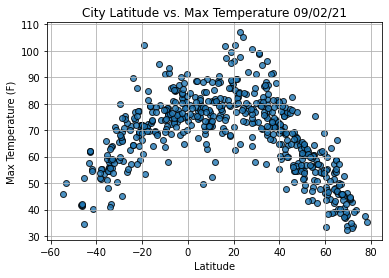

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

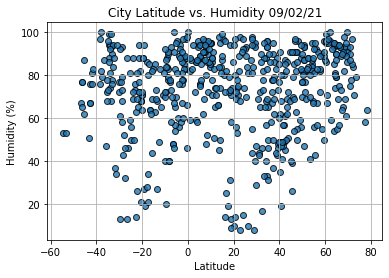

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

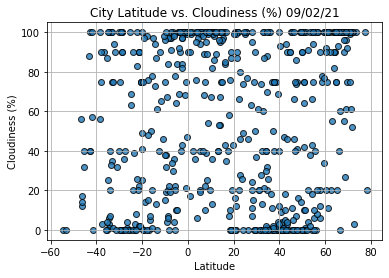

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

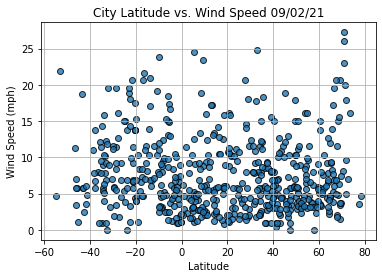

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()